## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
num_mice = len(mouse_metadata)
print(num_mice)
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
len(merge_df['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.loc[merge_df["Mouse ID"] != "g989" ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"] == "g989" ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df["Mouse ID"] != "g989" ]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [10]:
reg_groupby =  merge_df.groupby(["Drug Regimen"])
r_mean = reg_groupby["Tumor Volume (mm3)"].mean()
r_median = reg_groupby["Tumor Volume (mm3)"].median()
r_var = reg_groupby["Tumor Volume (mm3)"].var()
r_std = reg_groupby["Tumor Volume (mm3)"].std()
r_sem = reg_groupby["Tumor Volume (mm3)"].sem()


In [11]:
mouse_metadata.count()
study_results.count()
merge_df.count()
len(merge_df['Mouse ID'].unique())

249

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_df = pd.DataFrame(
{"mean" : r_mean,
"median" : r_median,
 "var": r_var,
 "std" : r_std,
 "sem" : r_sem,
})
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Mice')

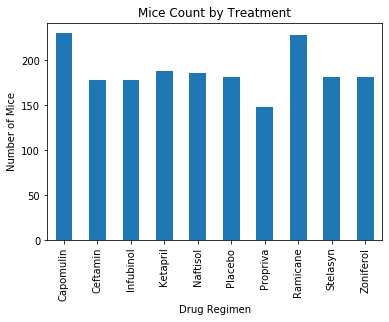

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
grouped = clean_df.groupby('Drug Regimen')
grouped["Mouse ID"].count()
#drug_names = grouped["Drug Regimen"]
drug_counts = grouped["Mouse ID"].count()
drug_chart = drug_counts.plot(kind="bar", title="Mice Count by Treatment")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mice")

In [14]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


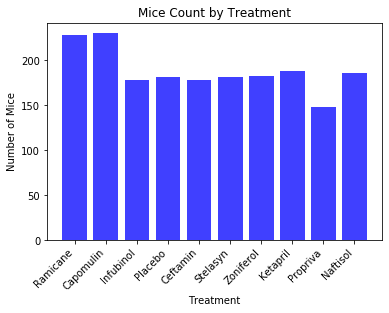

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Get list of med names
med_names = clean_df['Drug Regimen'].unique()
#dir(med_names)
med_names
#Get List of how many mice have taken each meds using count or value counts

num_mice = []
len(med_names)
for row in med_names:
    meds = clean_df.loc[clean_df["Drug Regimen"] == row]
    num_mice.append(len(meds))


plt.bar(med_names, num_mice, facecolor="Blue", alpha=0.75, align="center")
#plt.xticks(ind, countries)
plt.ylabel("Number of Mice")
plt.xlabel("Treatment")
plt.title("Mice Count by Treatment")
plt.ylim=1.0
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Pie Plots

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,123,123,123,123
Male,125,125,125,125


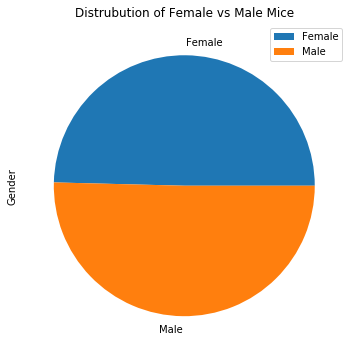

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989" ]
mouse_gender = clean_mouse.groupby("Sex").count()

plot = mouse_gender.plot.pie(y = 'Mouse ID',figsize=(6, 6), title = "Distrubution of Female vs Male Mice")
plot.set_ylabel("Gender")
mouse_gender

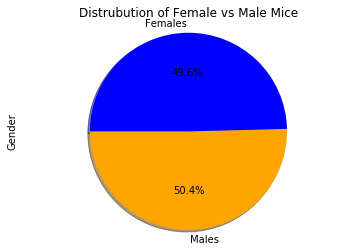

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,123,123,123,123
Male,125,125,125,125


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# DATA SET 3
gen = ["Males", "Females"]
members = [mouse_gender["Mouse ID"]['Male'], mouse_gender["Mouse ID"]['Female']]
colors = ["orange", "blue"]
plt.title("Distrubution of Female vs Male Mice")
plt.pie(members, labels=gen, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Gender")
plt.axis("equal")
plt.show()
mouse_gender

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

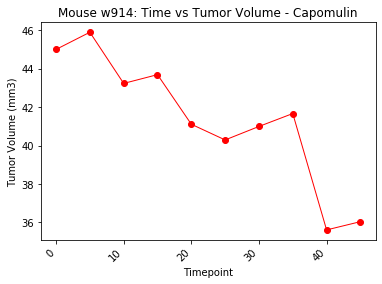

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
one_mouse = clean_df.loc[clean_df['Mouse ID'] == 'w914']
timepoint = []
vol = []

for col, row in one_mouse.iterrows():
    timepoint.append(row['Timepoint'])
    vol.append(row['Tumor Volume (mm3)'])

plt.plot(timepoint, vol, marker="o", color="red", linewidth=1)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title(f"Mouse w914: Time vs Tumor Volume - Capomulin")
plt.ylim=1.0
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_mice = cap_mice[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)','Timepoint']]
mice_data = cap_mice.groupby("Mouse ID")
mice_data.groups




mice_data.size()


Mouse ID
b128    10
b742    10
f966     5
g288    10
g316    10
i557    10
i738    10
j119    10
j246     8
l509    10
l897    10
m601    10
m957    10
r157     4
r554    10
r944    10
s185    10
s710    10
t565    10
u364    10
v923    10
w150     3
w914    10
x401    10
y793    10
dtype: int64

In [51]:
mice_data.get_group('g288')


,Mouse ID,Weight (g),Tumor Volume (mm3),Timepoint
235,g288,19,45.000000,0
236,g288,19,45.839400,5
237,g288,19,46.304003,10
238,g288,19,42.172301,15
239,g288,19,42.957120,20
240,g288,19,42.368692,25
241,g288,19,42.874461,30
242,g288,19,38.954115,35
243,g288,19,36.356851,40
244,g288,19,37.074024,45


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
